In [77]:
import numpy as np 
import matplotlib.pyplot as plt



#Definição da função que retornará valores para serem printados

def simulate_virus_spread(N, I0, D0, R0, beta, gamma, mu, t_max):
    S = N - I0 - D0 - R0     #número total - infectados - mortes - recuperados
    I = I0                   #número de infecções inicial
    R = R0                   #número de recuperados inicial
    D = D0                   #número de mortes inicial
    
    susceptible = [S]
    infected = [I]
    dead = [D]
    
    for t in range(1, t_max):
        
        #Certo grau de aleatorieadade
        new_infections = np.random.poisson(beta * S * I / N)   #taxa de infecção
        new_recoveries = np.random.poisson(I * gamma)          #taxa de recuperação
        new_deaths = np.random.poisson(I * mu)                 #taxa de mortalidade
        
        S = S - new_infections + new_recoveries
        I += new_infections - new_recoveries - new_deaths
        D += new_deaths
        
        #População deve ficar sempre menor que a quantidade inicial de pessoas (sistema fechado)
        S = max(0, min(S, N))
        I = max(0, min(I, N))
        D = max(0, min(D, N))
        
        susceptible.append(S)
        infected.append(I)
        dead.append(D)
    
    return susceptible, infected, dead



#Definição da função para plotar o gráfico

def plotagem(s, i, d):  
    
    plt.plot(range(t_max), s, label='Susceptible', color='green')
    plt.plot(range(t_max), i, label='Infected', color='orange')
    plt.plot(range(t_max), d, label='Dead', color='purple')

    plt.xlabel('Time (days)')
    plt.ylabel('Number of people')
    plt.title('Spread of Virus')

    plt.legend()

    plt.savefig("grafico teste.png", dpi=600)

    return plt.show()

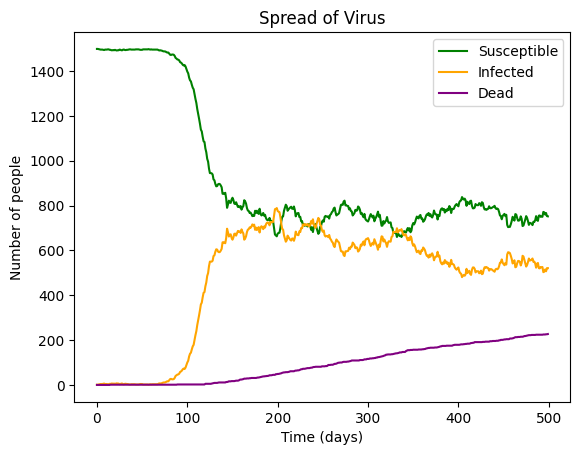

In [99]:
#teste!

N_pessoas = 1500
Infectados, D0, R0 = 1, 0, 0
tax_infec, tax_rec, tax_mort = 0.2, 0.1, 0.001
t_max = 500

#variáveis para atribuir os valores retornados da função.
s, i, d = simulate_virus_spread(N_pessoas, Infectados,0,0, tax_infec, tax_rec, tax_mort, t_max)

plotagem(s, i, d)